## 2. Data pre-processing
#### Step 1 - Data Cleaning 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("amazon reviews_MI.xlsx")
data.head()

,Unnamed: 0,stars,reviews,name
0,0,1,The media could not be loaded.\n ...,Ashraf
1,1,5,Febulas performance Redmi Note 8 ...I love it ...,Anil kumar sharma
2,2,5,best mobile under 10000,Mahendra
3,3,5,Redmi note 8 is the best Smartphone under 10k ...,Shah Arsalan
4,4,5,Loving the phone....Purchased with bank discou...,R.T


In [3]:
data.drop(columns=['Unnamed: 0', 'name'],inplace=True)
data.describe()

,stars
count,3100.000000
mean,3.584516
std,1.524550
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [4]:
data.shape

(3100, 2)

In [5]:
data.columns

Index(['stars', 'reviews'], dtype='object')

In [6]:
#Checking for null values
data.isnull().sum()

stars      0
reviews    1
dtype: int64

#### Removing punctuations, stopwords, URLs and emojis

In [7]:
# Convert text to lowercase
data['cleaned_reviews'] = data['reviews'].str.lower()

## removing punctuations
pattern = r"[^\w\s]"
data["cleaned_reviews"] = data["cleaned_reviews"].str.replace(pat=pattern, repl=" ", regex=True)
data.head(20)

,stars,reviews,cleaned_reviews
0,1,The media could not be loaded.\n ...,the media could not be loaded \n ...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 i love it ...
2,5,best mobile under 10000,best mobile under 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 is the best smartphone under 10k ...
4,5,Loving the phone....Purchased with bank discou...,loving the phone purchased with bank discou...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate so...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone under 10 000 specialy 18 watt...
7,5,Excellent phone in this price point 👌👌👌,excellent phone in this price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi has been a prominent smartphone brand wh...
9,5,I purchased it from redmi store. Its performan...,i purchased it from redmi store its performan...


In [8]:
# removing stopwords
data = data.dropna(thresh=3)
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
stopwords_set = set(stopwords)
cleaned_reviews = []

for index, row in data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.cleaned_reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_reviews.append(' '.join(words_without_stopwords))
    
data['cleaned_reviews'] = cleaned_reviews
data.head(20)

,stars,reviews,cleaned_reviews
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...
2,5,best mobile under 10000,best mobile 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...


In [9]:
# removing the accents
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

data["cleaned_reviews"] = data["cleaned_reviews"].apply(remove_accent)
data.head(20)

,stars,reviews,cleaned_reviews
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...
2,5,best mobile under 10000,best mobile 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...


In [10]:
# removing empty text spaces
print(data["reviews"].iloc[0])

data = data[data['cleaned_reviews']!='']
data.head(20)

The media could not be loaded.
                



 Phone hanged many times .I return it for replacement but not get back yet.Amazon shipping and replacement service is too bad. I uploaded a video....


,stars,reviews,cleaned_reviews
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...
2,5,best mobile under 10000,best mobile 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...


In [11]:
# removing hyperlinks
cleaned_reviews= []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.cleaned_reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

data['cleaned_reviews'] = cleaned_reviews
data.head(20)

,stars,reviews,cleaned_reviews
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...
2,5,best mobile under 10000,best mobile 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...


#### Step 2 - Tokenization

In [12]:
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
data['tokens'] = data.apply(lambda row: nltk.word_tokenize(row['cleaned_reviews']), axis=1)
data.head(10)

,stars,reviews,cleaned_reviews,tokens
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...,"[media, could, loaded, phone, hanged, many, ti..."
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...,"[febulas, performance, redmi, note, 8, love, f..."
2,5,best mobile under 10000,best mobile 10000,"[best, mobile, 10000]"
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019,"[redmi, note, 8, best, smartphone, 10k, year, ..."
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...,"[loving, phone, purchased, bank, discount, 6gb..."
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...,"[pros, batterycamerapricelookcons, delicate, h..."
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...,"[excellent, phone, 10, 000, specialy, 18, watt..."
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point,"[excellent, phone, price, point]"
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...,"[redmi, prominent, smartphone, brand, given, q..."
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...,"[purchased, redmi, store, performance, awesome..."


#### Step 3 - POS(part of speech) Labelling

In [13]:
nltk.download('wordnet')
from nltk.corpus import wordnet
pos_dict ={'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV,}
def token_pos(text):
    tags = pos_tag(text)
    newlist=[]
    for word,tag in tags:
        newlist.append(tuple([word,pos_dict.get(tag[0])]))
    return newlist

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tripti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
data['POS_Tagging'] = data['tokens'].apply(token_pos)
data.head(10)

,stars,reviews,cleaned_reviews,tokens,POS_Tagging
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...,"[media, could, loaded, phone, hanged, many, ti...","[(media, n), (could, None), (loaded, v), (phon..."
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...,"[febulas, performance, redmi, note, 8, love, f...","[(febulas, n), (performance, n), (redmi, v), (..."
2,5,best mobile under 10000,best mobile 10000,"[best, mobile, 10000]","[(best, r), (mobile, a), (10000, None)]"
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019,"[redmi, note, 8, best, smartphone, 10k, year, ...","[(redmi, a), (note, n), (8, None), (best, a), ..."
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...,"[loving, phone, purchased, bank, discount, 6gb...","[(loving, v), (phone, n), (purchased, v), (ban..."
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...,"[pros, batterycamerapricelookcons, delicate, h...","[(pros, n), (batterycamerapricelookcons, n), (..."
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...,"[excellent, phone, 10, 000, specialy, 18, watt...","[(excellent, a), (phone, n), (10, None), (000,..."
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point,"[excellent, phone, price, point]","[(excellent, a), (phone, n), (price, n), (poin..."
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...,"[redmi, prominent, smartphone, brand, given, q...","[(redmi, n), (prominent, a), (smartphone, n), ..."
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...,"[purchased, redmi, store, performance, awesome...","[(purchased, v), (redmi, n), (store, n), (perf..."


#### Step 4 - Lemmatization (getting the root words)

In [15]:
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew=" "
    for word,pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = word_lemmatizer.lemmatize(word,pos=pos)
            lemma_rew= lemma_rew + " "+ lemma
    return lemma_rew


In [16]:
data['Lemmas'] = data['POS_Tagging'].apply(lemmatize)
data.head(10)

,stars,reviews,cleaned_reviews,tokens,POS_Tagging,Lemmas
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...,"[media, could, loaded, phone, hanged, many, ti...","[(media, n), (could, None), (loaded, v), (phon...",medium could load phone hang many time retur...
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...,"[febulas, performance, redmi, note, 8, love, f...","[(febulas, n), (performance, n), (redmi, v), (...",febulas performance redmi note 8 love first ...
2,5,best mobile under 10000,best mobile 10000,"[best, mobile, 10000]","[(best, r), (mobile, a), (10000, None)]",best mobile 10000
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019,"[redmi, note, 8, best, smartphone, 10k, year, ...","[(redmi, a), (note, n), (8, None), (best, a), ...",redmi note 8 best smartphone 10k year 2019
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...,"[loving, phone, purchased, bank, discount, 6gb...","[(loving, v), (phone, n), (purchased, v), (ban...",love phone purchase bank discount 6gb 128gb ...
5,5,Pros- batteryCameraPriceLookCons- delicate. So...,pros batterycamerapricelookcons delicate handl...,"[pros, batterycamerapricelookcons, delicate, h...","[(pros, n), (batterycamerapricelookcons, n), (...",pro batterycamerapricelookcons delicate hand...
6,5,"Excellent phone under 10,000. Specialy 18 watt...",excellent phone 10 000 specialy 18 watt fast c...,"[excellent, phone, 10, 000, specialy, 18, watt...","[(excellent, a), (phone, n), (10, None), (000,...",excellent phone 10 000 specialy 18 watt fast...
7,5,Excellent phone in this price point 👌👌👌,excellent phone price point,"[excellent, phone, price, point]","[(excellent, a), (phone, n), (price, n), (poin...",excellent phone price point
8,2,Redmi has been a prominent smartphone brand wh...,redmi prominent smartphone brand given quality...,"[redmi, prominent, smartphone, brand, given, q...","[(redmi, n), (prominent, a), (smartphone, n), ...",redmi prominent smartphone brand give qualit...
9,5,I purchased it from redmi store. Its performan...,purchased redmi store performance awesome supe...,"[purchased, redmi, store, performance, awesome...","[(purchased, v), (redmi, n), (store, n), (perf...",purchase redmi store performance awesome sup...


## 3. EDA

D:\anaconda2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda2022\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rating')

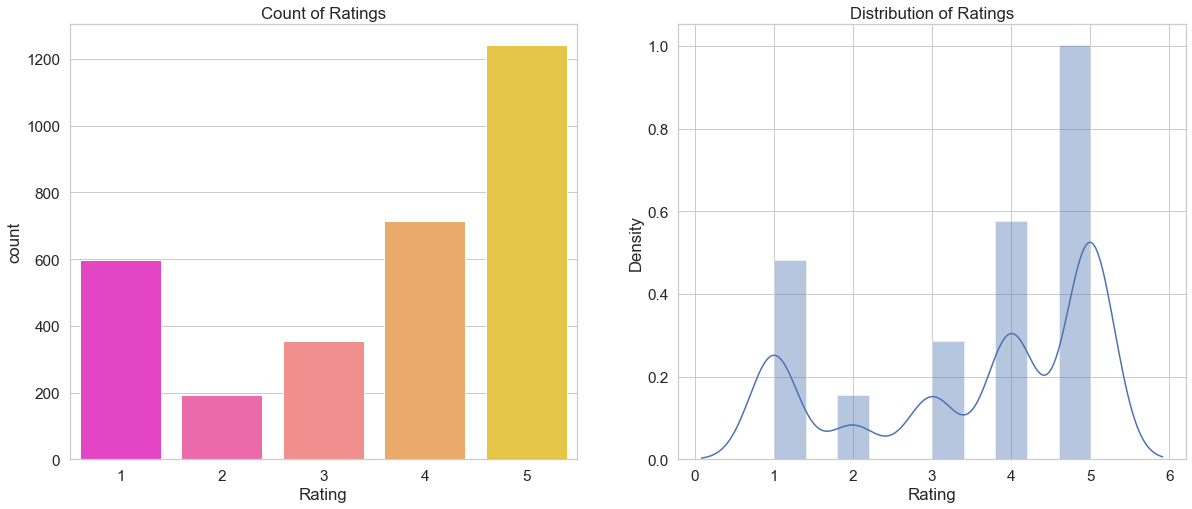

In [17]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['stars'], palette = 'spring', ax = ax[0])
sns_2 = sns.distplot(data['stars'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

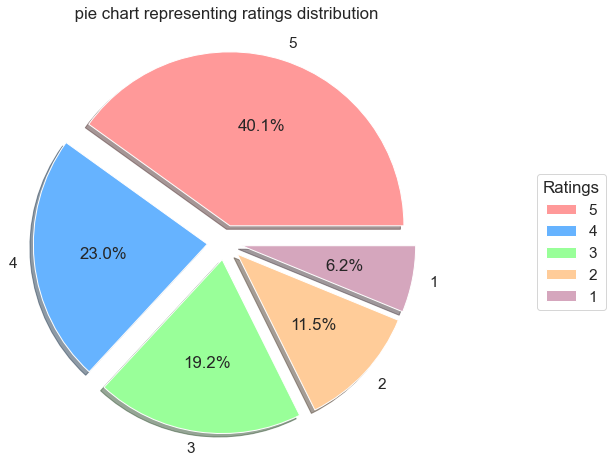

In [18]:
labels = '5', '4', '3', '2', '1'
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#d5a6bd']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]


plt.pie(data['stars'].value_counts(), labels = labels, colors = colors, explode = explode, shadow = True,autopct='%1.1f%%',)
plt.title(' pie chart representing ratings distribution')
plt.legend(title="Ratings",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.show()

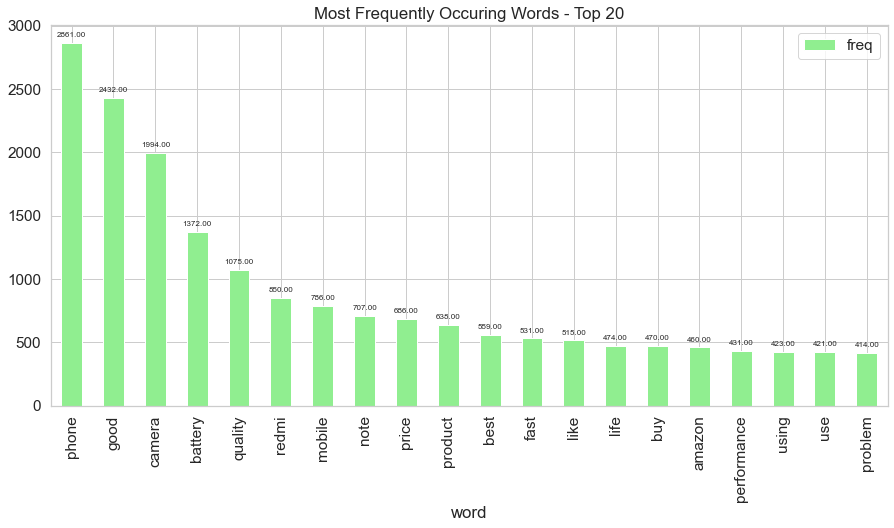

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.reviews.values.astype('U'))
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])


ax = frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'lightgreen')
plt.title("Most Frequently Occuring Words - Top 20")

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

D:\anaconda2022\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of words per review')

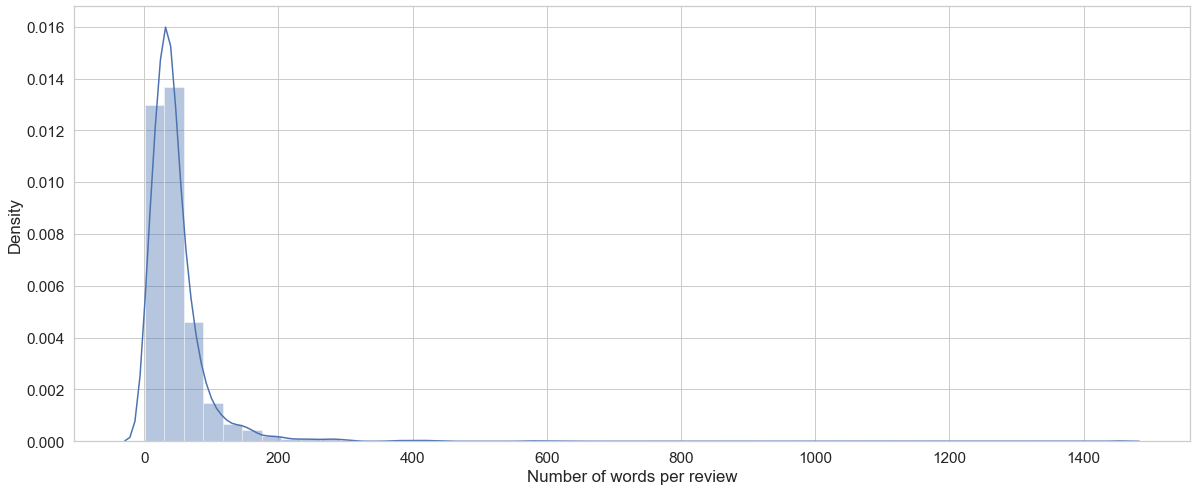

In [20]:
sns.distplot(a=data['reviews'].apply(lambda x: len(x.split())))
plt.xlabel("Number of words per review")

D:\anaconda2022\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of sentences per review')

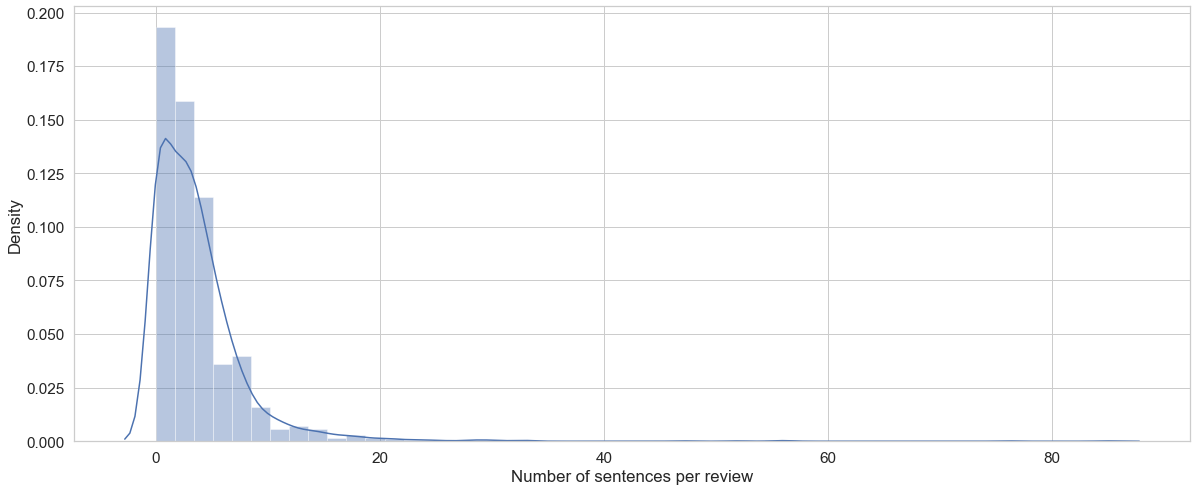

In [21]:
sns.distplot(a=data['reviews'].str.count('[\w][\.!\?]'))
plt.xlabel("Number of sentences per review")

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
from nltk.corpus import stopwords

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

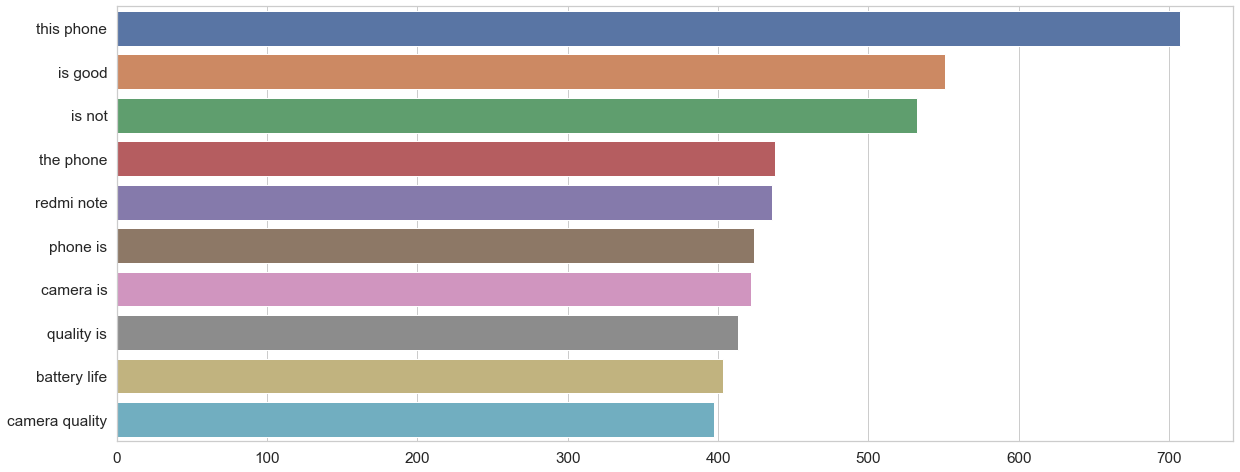

In [23]:
plot_top_ngrams_barchart(data['reviews'],2)

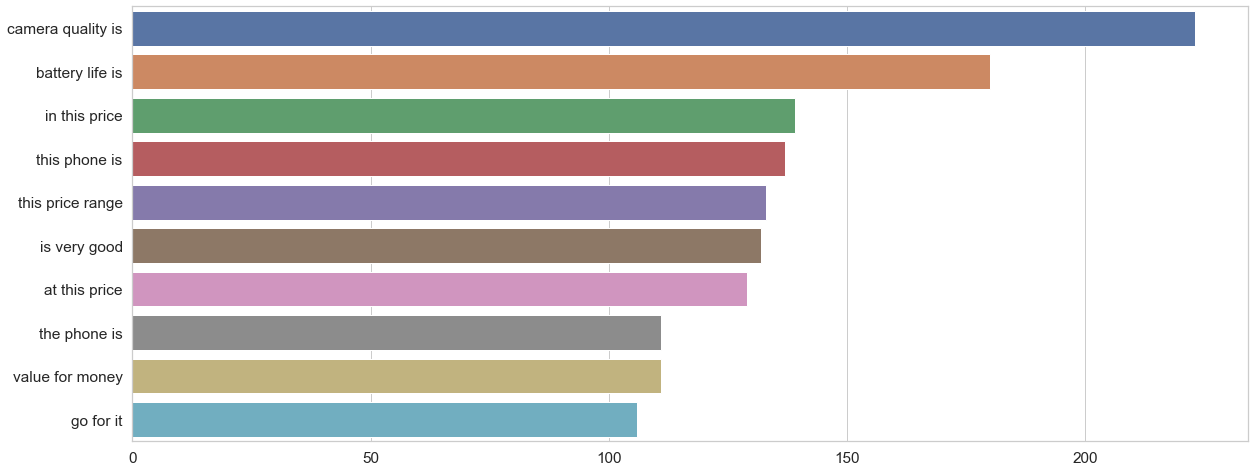

In [24]:
plot_top_ngrams_barchart(data['reviews'],3)

## 4. Sentimental Analysis

In [25]:
# using VADER SentimentIntensityAnalyser to calculate the sentiment score
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in data['cleaned_reviews']]
data['sentiment_score'] = polarity
data.tail(5)

,stars,reviews,cleaned_reviews,tokens,POS_Tagging,Lemmas,sentiment_score
3095,5,Gohead buy it guys.,gohead buy guys,"[gohead, buy, guys]","[(gohead, a), (buy, n), (guys, n)]",gohead buy guy,0.00
3096,5,Good product,good product,"[good, product]","[(good, a), (product, n)]",good product,0.44
3097,4,Good,good,[good],"[(good, a)]",good,0.44
3098,4,Battery back up is nothing like redmi note 4 b...,battery back nothing like redmi note 4 4000 ma...,"[battery, back, nothing, like, redmi, note, 4,...","[(battery, n), (back, r), (nothing, n), (like,...",battery back nothing like redmi note 4 4000 ...,-0.03
3099,5,Awesome phone in this range. Finger print read...,awesome phone range finger print reader workin...,"[awesome, phone, range, finger, print, reader,...","[(awesome, a), (phone, n), (range, n), (finger...",awesome phone range finger print reader work...,0.62


In [26]:
data['scores'] = data['cleaned_reviews'].apply(lambda review: sent.polarity_scores(review))
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
data.head(5)

,stars,reviews,cleaned_reviews,tokens,POS_Tagging,Lemmas,sentiment_score,scores,compound,comp_score
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...,"[media, could, loaded, phone, hanged, many, ti...","[(media, n), (could, None), (loaded, v), (phon...",medium could load phone hang many time retur...,-0.42,"{'neg': 0.158, 'neu': 0.766, 'pos': 0.077, 'co...",-0.4215,neg
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...,"[febulas, performance, redmi, note, 8, love, f...","[(febulas, n), (performance, n), (redmi, v), (...",febulas performance redmi note 8 love first ...,0.91,"{'neg': 0.0, 'neu': 0.451, 'pos': 0.549, 'comp...",0.9081,pos
2,5,best mobile under 10000,best mobile 10000,"[best, mobile, 10000]","[(best, r), (mobile, a), (10000, None)]",best mobile 10000,0.64,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.6369,pos
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019,"[redmi, note, 8, best, smartphone, 10k, year, ...","[(redmi, a), (note, n), (8, None), (best, a), ...",redmi note 8 best smartphone 10k year 2019,0.64,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6369,pos
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...,"[loving, phone, purchased, bank, discount, 6gb...","[(loving, v), (phone, n), (purchased, v), (ban...",love phone purchase bank discount 6gb 128gb ...,0.99,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.9940,pos


In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['y'] = labelencoder.fit_transform(data['comp_score'])
data.head(5)

,stars,reviews,cleaned_reviews,tokens,POS_Tagging,Lemmas,sentiment_score,scores,compound,comp_score,y
0,1,The media could not be loaded.\n ...,media could loaded phone hanged many times ret...,"[media, could, loaded, phone, hanged, many, ti...","[(media, n), (could, None), (loaded, v), (phon...",medium could load phone hang many time retur...,-0.42,"{'neg': 0.158, 'neu': 0.766, 'pos': 0.077, 'co...",-0.4215,neg,0
1,5,Febulas performance Redmi Note 8 ...I love it ...,febulas performance redmi note 8 love first ti...,"[febulas, performance, redmi, note, 8, love, f...","[(febulas, n), (performance, n), (redmi, v), (...",febulas performance redmi note 8 love first ...,0.91,"{'neg': 0.0, 'neu': 0.451, 'pos': 0.549, 'comp...",0.9081,pos,1
2,5,best mobile under 10000,best mobile 10000,"[best, mobile, 10000]","[(best, r), (mobile, a), (10000, None)]",best mobile 10000,0.64,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.6369,pos,1
3,5,Redmi note 8 is the best Smartphone under 10k ...,redmi note 8 best smartphone 10k year 2019,"[redmi, note, 8, best, smartphone, 10k, year, ...","[(redmi, a), (note, n), (8, None), (best, a), ...",redmi note 8 best smartphone 10k year 2019,0.64,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6369,pos,1
4,5,Loving the phone....Purchased with bank discou...,loving phone purchased bank discount 6gb 128gb...,"[loving, phone, purchased, bank, discount, 6gb...","[(loving, v), (phone, n), (purchased, v), (ban...",love phone purchase bank discount 6gb 128gb ...,0.99,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.9940,pos,1


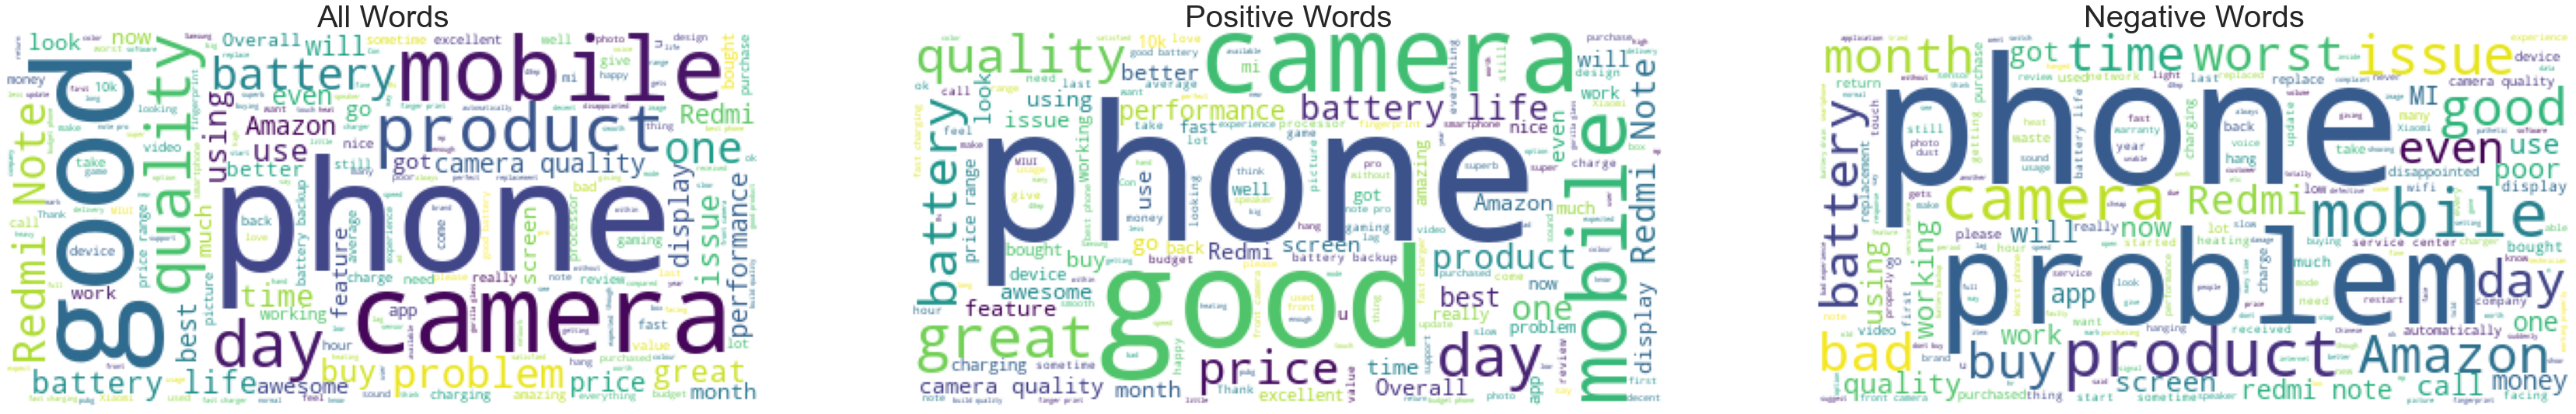

In [28]:
# Displaying word cloud
from wordcloud import WordCloud

All_word = ''.join(data['reviews'].tolist()) # All words in the given corpus
positive_words = ''.join(data[data['y']==1]['reviews'].tolist()) # All positive words
negative_words = ''.join(data[data['y']==0]['reviews'].tolist()) # All negative words
category = ['All Words','Positive Words','Negative Words']
data_wordcloud = [All_word,positive_words,negative_words]

plt.figure(figsize=(80,80))
for i in range(0,3):
    t=i+1
    plt.subplot(5, 4, t).set_title(category[i],fontsize=40)
    plt.axis('off')
    plt.imshow(WordCloud(background_color='white').generate(data_wordcloud[i]))
plt.savefig('Wordcloud.png')
plt.show()

## 5. Feature Engineering 

In [29]:
# Bag of Words(BOW) Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
text_counts= cv.fit_transform(data['cleaned_reviews'])
text_counts

<3099x8215 sparse matrix of type '<class 'numpy.int64'>'
	with 73725 stored elements in Compressed Sparse Row format>

In [30]:
# TFIDF Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tfidf_scores= tf.fit_transform(data['cleaned_reviews'])
tfidf_scores

<3099x8215 sparse matrix of type '<class 'numpy.float64'>'
	with 73725 stored elements in Compressed Sparse Row format>

## 6. Model Building 

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def scores(model):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    precision = precision_score(y_test_pred, y_test)
    print('Precision: %f' % precision)
    recall = recall_score(y_test_pred, y_test)
    print('Recall: %f' % recall)
    f1 = f1_score(y_test_pred, y_test)
    print('F1 score: %f' % f1)
    accuracy = accuracy_score(y_test_pred, y_test)
    print('Accuracy: %f' % accuracy)

### Model Building using Tf-IDF Feature extraction technique

In [33]:
#train-test split
from sklearn.model_selection import train_test_split
y = data.y
X = tfidf_scores

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.8)

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (2479, 8215)
train size y :  (2479,)
test size X :  (620, 8215)
test size y :  (620,)


In [34]:
# 1.Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

mnb_clf_tfidf = MultinomialNB().fit(X_train, y_train)
evaluate(mnb_clf_tfidf, X_train, X_test, y_train, y_test)
scores(mnb_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[  16  462]
 [   0 2001]]
ACCURACY SCORE:
0.8136
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    1.000000     0.812424  0.813635     0.906212      0.848592
recall       0.033473     1.000000  0.813635     0.516736      0.813635
f1-score     0.064777     0.896505  0.813635     0.480641      0.736132
support    478.000000  2001.000000  0.813635  2479.000000   2479.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[  0 114]
 [  2 504]]
ACCURACY SCORE:
0.8129
CLASSIFICATION REPORT:
               0           1  accuracy   macro avg  weighted avg
precision    0.0    0.815534  0.812903    0.407767      0.665581
recall       0.0    0.996047  0.812903    0.498024      0.812903
f1-score     0.0    0.896797  0.812903    0.448399      0.731902
support    114.0  506.000000  0.812903  620.000000    620.000000
Precision: 0.996047
Recall: 0.815534
F1 score: 0.896797
Accuracy: 0.812903


In [35]:
# 2.ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
ex_tree_clf_tfidf = ExtraTreesClassifier(n_estimators=100, max_features=5, random_state=42)
ex_tree_clf_tfidf.fit(X_train, y_train)
evaluate(ex_tree_clf_tfidf, X_train, X_test, y_train, y_test)
scores(ex_tree_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 478    0]
 [   0 2001]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision    1.0     1.0       1.0        1.0           1.0
recall       1.0     1.0       1.0        1.0           1.0
f1-score     1.0     1.0       1.0        1.0           1.0
support    478.0  2001.0       1.0     2479.0        2479.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[  2 112]
 [  2 504]]
ACCURACY SCORE:
0.8161
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.500000    0.818182  0.816129    0.659091      0.759677
recall       0.017544    0.996047  0.816129    0.506796      0.816129
f1-score     0.033898    0.898396  0.816129    0.466147      0.739440
support    114.000000  506.000000  0.816129  620.000000    620.000000
Precision: 0.996047
Recall: 0.818182
F1 score: 0.898396
Accuracy: 0.816129


In [36]:
# 3. AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf_tfidf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf_tfidf.fit(X_train, y_train)
evaluate(ada_boost_clf_tfidf, X_train, X_test, y_train, y_test)
scores(ada_boost_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 307  171]
 [  58 1943]]
ACCURACY SCORE:
0.9076
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.841096     0.919111  0.907624     0.880103      0.904068
recall       0.642259     0.971014  0.907624     0.806637      0.907624
f1-score     0.728351     0.944350  0.907624     0.836351      0.902701
support    478.000000  2001.000000  0.907624  2479.000000   2479.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 73  41]
 [ 16 490]]
ACCURACY SCORE:
0.9081
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.820225    0.922787  0.908065    0.871506      0.903929
recall       0.640351    0.968379  0.908065    0.804365      0.908065
f1-score     0.719212    0.945034  0.908065    0.832123      0.903512
support    114.000000  506.000000  0.908065  620.000000    620.000000
Precision: 0.968379
Recall: 0.922787
F1 score: 0.945034
Accuracy: 0.908065


In [37]:
# 4. SVC 
from sklearn.svm import SVC
svm_clf_tfidf = SVC(gamma='scale')
svm_clf_tfidf.fit(X_train, y_train)
evaluate(svm_clf_tfidf, X_train, X_test, y_train, y_test)
scores(svm_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 467   11]
 [   0 2001]]
ACCURACY SCORE:
0.9956
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    1.000000     0.994533  0.995563     0.997266      0.995587
recall       0.976987     1.000000  0.995563     0.988494      0.995563
f1-score     0.988360     0.997259  0.995563     0.992809      0.995543
support    478.000000  2001.000000  0.995563  2479.000000   2479.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 44  70]
 [  5 501]]
ACCURACY SCORE:
0.8790
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.897959    0.877408  0.879032    0.887684      0.881187
recall       0.385965    0.990119  0.879032    0.688042      0.879032
f1-score     0.539877    0.930362  0.879032    0.735120      0.858563
support    114.000000  506.000000  0.879032  620.000000    620.000000
Precision: 0.990119
Recall: 0.877408
F1 score: 0.930362
Accuracy: 0.879032


In [38]:
# 5. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree_clf_tfidf = DecisionTreeClassifier()
tree_clf_tfidf.fit(X_train, y_train)
evaluate(tree_clf_tfidf, X_train, X_test, y_train, y_test)
scores(tree_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 478    0]
 [   0 2001]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision    1.0     1.0       1.0        1.0           1.0
recall       1.0     1.0       1.0        1.0           1.0
f1-score     1.0     1.0       1.0        1.0           1.0
support    478.0  2001.0       1.0     2479.0        2479.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 71  43]
 [ 42 464]]
ACCURACY SCORE:
0.8629
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.628319    0.915187  0.862903    0.771753      0.862441
recall       0.622807    0.916996  0.862903    0.769902      0.862903
f1-score     0.625551    0.916091  0.862903    0.770821      0.862669
support    114.000000  506.000000  0.862903  620.000000    620.000000
Precision: 0.916996
Recall: 0.915187
F1 score: 0.916091
Accuracy: 0.862903


In [39]:
# 6. GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf_tfidf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf_tfidf.fit(X_train, y_train)
evaluate(grad_boost_clf_tfidf, X_train, X_test, y_train, y_test)
scores(grad_boost_clf_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 313  165]
 [   9 1992]]
ACCURACY SCORE:
0.9298
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.972050     0.923505   0.92981     0.947777      0.932865
recall       0.654812     0.995502   0.92981     0.825157      0.929810
f1-score     0.782500     0.958153   0.92981     0.870326      0.924284
support    478.000000  2001.000000   0.92981  2479.000000   2479.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 62  52]
 [ 18 488]]
ACCURACY SCORE:
0.8871
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.775000    0.903704  0.887097    0.839352      0.880039
recall       0.543860    0.964427  0.887097    0.754143      0.887097
f1-score     0.639175    0.933078  0.887097    0.786127      0.879038
support    114.000000  506.000000  0.887097  620.000000    620.000000
Precision: 0.964427
Recall: 0.903704
F1 score: 0.933078
Accuracy: 0.887097


In [40]:
# 7. LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg_tfidf = LogisticRegression(solver='liblinear')
log_reg_tfidf.fit(X_train, y_train)
evaluate(log_reg_tfidf, X_train, X_test, y_train, y_test)
scores(log_reg_tfidf)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 259  219]
 [   3 1998]]
ACCURACY SCORE:
0.9104
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.988550     0.901218  0.910448     0.944884      0.918057
recall       0.541841     0.998501  0.910448     0.770171      0.910448
f1-score     0.700000     0.947368  0.910448     0.823684      0.899671
support    478.000000  2001.000000  0.910448  2479.000000   2479.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 39  75]
 [  5 501]]
ACCURACY SCORE:
0.8710
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.886364    0.869792  0.870968    0.878078      0.872839
recall       0.342105    0.990119  0.870968    0.666112      0.870968
f1-score     0.493671    0.926063  0.870968    0.709867      0.846559
support    114.000000  506.000000  0.870968  620.000000    620.000000
Precision: 0.990119
Recall: 0.869792
F1 score: 0.926063
Accuracy: 0.870968


### Model building using Bag of words(BOW) feature extraction technique

In [41]:
#train-test split
from sklearn.model_selection import train_test_split
y = data.y
X = text_counts

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.8)

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (2479, 8215)
train size y :  (2479,)
test size X :  (620, 8215)
test size y :  (620,)


In [42]:
# 1.  Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
mnb_clf_bow = MultinomialNB().fit(X_train, y_train)
evaluate(mnb_clf_bow, X_train, X_test, y_train, y_test)
scores(mnb_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 375  103]
 [ 126 1875]]
ACCURACY SCORE:
0.9076
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.748503     0.947927  0.907624     0.848215      0.909474
recall       0.784519     0.937031  0.907624     0.860775      0.907624
f1-score     0.766088     0.942448  0.907624     0.854268      0.908442
support    478.000000  2001.000000  0.907624  2479.000000   2479.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 78  36]
 [ 59 447]]
ACCURACY SCORE:
0.8468
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.569343    0.925466  0.846774    0.747404      0.859985
recall       0.684211    0.883399  0.846774    0.783805      0.846774
f1-score     0.621514    0.903943  0.846774    0.762729      0.852013
support    114.000000  506.000000  0.846774  620.000000    620.000000
Precision: 0.883399
Recall: 0.925466
F1 score: 0.903943
Accuracy: 0.846774


In [43]:
# 2. ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
ex_tree_clf_bow = ExtraTreesClassifier(n_estimators=100, max_features=5, random_state=42)
ex_tree_clf_bow.fit(X_train, y_train)
evaluate(ex_tree_clf_bow, X_train, X_test, y_train, y_test)
scores(ex_tree_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 478    0]
 [   0 2001]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision    1.0     1.0       1.0        1.0           1.0
recall       1.0     1.0       1.0        1.0           1.0
f1-score     1.0     1.0       1.0        1.0           1.0
support    478.0  2001.0       1.0     2479.0        2479.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[  7 107]
 [  2 504]]
ACCURACY SCORE:
0.8242
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.777778    0.824877  0.824194    0.801328      0.816217
recall       0.061404    0.996047  0.824194    0.528725      0.824194
f1-score     0.113821    0.902417  0.824194    0.508119      0.757417
support    114.000000  506.000000  0.824194  620.000000    620.000000
Precision: 0.996047
Recall: 0.824877
F1 score: 0.902417
Accuracy: 0.824194


In [44]:
# 3. AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf_bow= AdaBoostClassifier(n_estimators=30)
ada_boost_clf_bow.fit(X_train, y_train)
evaluate(ada_boost_clf_bow, X_train, X_test, y_train, y_test)
scores(ada_boost_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 306  172]
 [  64 1937]]
ACCURACY SCORE:
0.9048
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.827027     0.918445    0.9048     0.872736      0.900818
recall       0.640167     0.968016    0.9048     0.804092      0.904800
f1-score     0.721698     0.942579    0.9048     0.832139      0.899989
support    478.000000  2001.000000    0.9048  2479.000000   2479.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 79  35]
 [ 22 484]]
ACCURACY SCORE:
0.9081
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.782178    0.932563  0.908065    0.857370      0.904911
recall       0.692982    0.956522  0.908065    0.824752      0.908065
f1-score     0.734884    0.944390  0.908065    0.839637      0.905868
support    114.000000  506.000000  0.908065  620.000000    620.000000
Precision: 0.956522
Recall: 0.932563
F1 score: 0.944390
Accuracy: 0.908065


In [45]:
# 4. SVC
from sklearn.svm import SVC
svm_clf_bow = SVC(gamma='scale')
svm_clf_bow.fit(X_train, y_train)
evaluate(svm_clf_bow, X_train, X_test, y_train, y_test)
scores(svm_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 358  120]
 [   0 2001]]
ACCURACY SCORE:
0.9516
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    1.000000     0.943423  0.951593     0.971711      0.954332
recall       0.748954     1.000000  0.951593     0.874477      0.951593
f1-score     0.856459     0.970888  0.951593     0.913674      0.948824
support    478.000000  2001.000000  0.951593  2479.000000   2479.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 47  67]
 [ 10 496]]
ACCURACY SCORE:
0.8758
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.824561    0.880995  0.875806    0.852778      0.870618
recall       0.412281    0.980237  0.875806    0.696259      0.875806
f1-score     0.549708    0.927970  0.875806    0.738839      0.858419
support    114.000000  506.000000  0.875806  620.000000    620.000000
Precision: 0.980237
Recall: 0.880995
F1 score: 0.927970
Accuracy: 0.875806


In [46]:
# 5. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree_clf_bow = DecisionTreeClassifier()
tree_clf_bow.fit(X_train, y_train)
evaluate(tree_clf_bow, X_train, X_test, y_train, y_test)
scores(tree_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 478    0]
 [   0 2001]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision    1.0     1.0       1.0        1.0           1.0
recall       1.0     1.0       1.0        1.0           1.0
f1-score     1.0     1.0       1.0        1.0           1.0
support    478.0  2001.0       1.0     2479.0        2479.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 71  43]
 [ 48 458]]
ACCURACY SCORE:
0.8532
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.596639    0.914172  0.853226    0.755405      0.855787
recall       0.622807    0.905138  0.853226    0.763973      0.853226
f1-score     0.609442    0.909633  0.853226    0.759537      0.854436
support    114.000000  506.000000  0.853226  620.000000    620.000000
Precision: 0.905138
Recall: 0.914172
F1 score: 0.909633
Accuracy: 0.853226


In [47]:
# 6. GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf_bow = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf_bow.fit(X_train, y_train)
evaluate(grad_boost_clf_bow, X_train, X_test, y_train, y_test)
scores(grad_boost_clf_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 301  177]
 [  15 1986]]
ACCURACY SCORE:
0.9225
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.952532     0.918169  0.922549     0.935350      0.924795
recall       0.629707     0.992504  0.922549     0.811105      0.922549
f1-score     0.758186     0.953890  0.922549     0.856038      0.916155
support    478.000000  2001.000000  0.922549  2479.000000   2479.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 54  60]
 [ 16 490]]
ACCURACY SCORE:
0.8774
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.771429    0.890909  0.877419    0.831169      0.868940
recall       0.473684    0.968379  0.877419    0.721032      0.877419
f1-score     0.586957    0.928030  0.877419    0.757493      0.865317
support    114.000000  506.000000  0.877419  620.000000    620.000000
Precision: 0.968379
Recall: 0.890909
F1 score: 0.928030
Accuracy: 0.877419


In [48]:
# 7. LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg_bow = LogisticRegression(solver='liblinear')
log_reg_bow.fit(X_train, y_train)
evaluate(log_reg_bow, X_train, X_test, y_train, y_test)
scores(log_reg_bow)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 465   13]
 [   0 2001]]
ACCURACY SCORE:
0.9948
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    1.000000     0.993545  0.994756     0.996773      0.994790
recall       0.972803     1.000000  0.994756     0.986402      0.994756
f1-score     0.986214     0.996762  0.994756     0.991488      0.994728
support    478.000000  2001.000000  0.994756  2479.000000   2479.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 80  34]
 [ 19 487]]
ACCURACY SCORE:
0.9145
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.808081    0.934741  0.914516    0.871411      0.911452
recall       0.701754    0.962451  0.914516    0.832102      0.914516
f1-score     0.751174    0.948393  0.914516    0.849784      0.912130
support    114.000000  506.000000  0.914516  620.000000    620.000000
Precision: 0.962451
Recall: 0.934741
F1 score: 0.948393
Accuracy: 0.914516


## Topic Modelling using LDA and NMF (Latent Dirichlet Allocation and Non-Negative Matrix factorization)

In [49]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
# Define Search Parameters
search_params = {'n_components': [4, 5, 6, 7, 8, 9, 10], 'learning_decay': [.5, .7, .9]}

# Initiate the Model
lda = LatentDirichletAllocation()

# Initiate Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(text_counts)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [4, 5, 6, 7, 8, 9, 10]})

In [50]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 4}


In [51]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, text_counts, cv, mds='tsne')
panel

D:\anaconda2022\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda2022\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
D:\anaconda2022\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\anaconda2022\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\anaconda2022\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      269.562408 -124.803398       1        1  36.980852
1        1.782994 -295.079681       2        1  34.134932
3      220.811432 -343.832123       3        1  23.541137
0       50.533993  -76.050934       4        1   5.343079, topic_info=         Term         Freq        Total Category  logprob  loglift
5070     note   615.000000   615.000000  Default  30.0000  30.0000
6221    redmi   751.000000   751.000000  Default  29.0000  29.0000
3489     good  2262.000000  2262.000000  Default  28.0000  28.0000
1643   camera  1849.000000  1849.000000  Default  27.0000  27.0000
903    amazon   423.000000   423.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
4407     like    13.174072   473.410640   Topic4  -5.8474  -0.6523
7505     time    12.370447   361.306810   Topic4  -5.9104  -0.4450
7834    using    11.496111   388.475075   Topic4  -5.9837  -0.5909
2857     even    10.139585   282.530909   Topic4  -6.1093  -0.3980
5856  product    10.518991   586.371552   Topic4  -6.0725  -1.0914

[334 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  0.328799      000
1         2  0.328799      000
1         4  0.361679      000
14        1  0.329801       10
14        2  0.380539       10
...     ...       ...      ...
8165      2  0.254703   xiaomi
8165      3  0.138929   xiaomi
8165      4  0.115774   xiaomi
8209      2  0.940350      yrs
8214      2  0.925473  zooming

[559 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [52]:
for i,topic in enumerate(best_lda_model.components_):
    print(f'Top 10 words for topic #{i}:')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['one', 'pro', 'got', 'great', 'phones', 'mi', 'buy', 'phone', 'redmi', 'note']


Top 10 words for topic #1:
['note', 'also', 'mobile', 'redmi', 'like', 'quality', 'battery', 'good', 'camera', 'phone']


Top 10 words for topic #2:
['great', 'also', 'fast', 'best', 'price', 'quality', 'battery', 'phone', 'camera', 'good']


Top 10 words for topic #3:
['service', 'time', 'redmi', 'working', 'product', 'issue', 'problem', 'amazon', 'mobile', 'phone']




D:\anaconda2022\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Deep Learning Model Building

In [53]:
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer,text_to_word_sequence
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.utils import plot_model,to_categorical
from tqdm import autonotebook

D:\anaconda2022\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
D:\anaconda2022\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
D:\anaconda2022\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:43: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
D:\anaconda

In [54]:
#Preprocessing
epoch = 15
batch_size = 64

n_unique_words = 10000
n_dim = 64
max_input_len = 100
drop_emb = 0.3

n_lstm = 128
drop_lstm = 0.2

# n_filter = 64
# n_kernel = 3

In [55]:
X = data['reviews']
y = data['y']

In [56]:
xtrain, xval, ytrain, yval = train_test_split(X,y,test_size=0.2,random_state=45)

In [57]:
tokenizer = Tokenizer(n_unique_words+1)
tokenizer.fit_on_texts(xtrain)

xtrain = tokenizer.texts_to_sequences(xtrain)
xval = tokenizer.texts_to_sequences(xval)

xtrain_seq = sequence.pad_sequences(xtrain,maxlen=max_input_len)
xval_seq = sequence.pad_sequences(xval,maxlen=max_input_len)

ytrain = np.array(ytrain)  
yval = np.array(yval)

## Bi-directional LSTM Architecture

In [58]:
model = Sequential()
model.add(Embedding(n_unique_words,n_dim,input_length=max_input_len))
model.add(SpatialDropout1D(drop_emb))
model.add(Bidirectional(LSTM(n_lstm,recurrent_dropout=drop_lstm)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               197632    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 837,889
Trainable params: 837,889
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

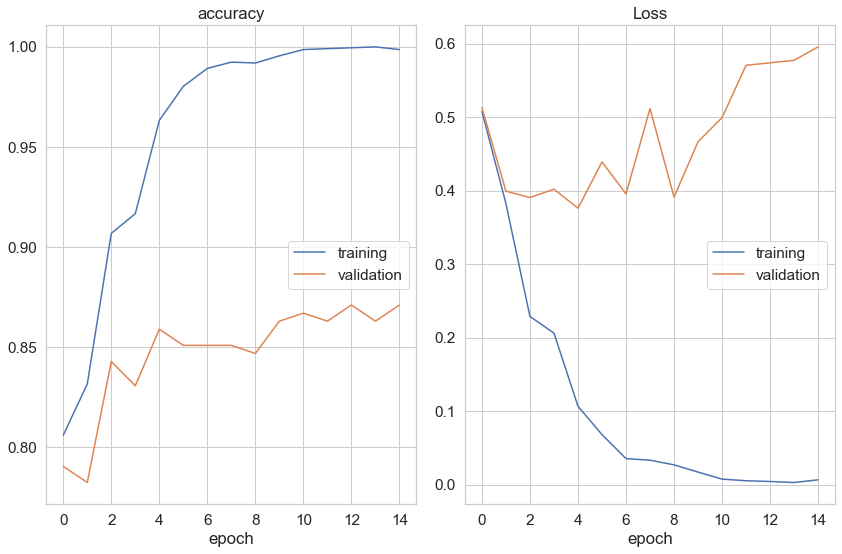

accuracy
	training         	 (min:    0.806, max:    1.000, cur:    0.999)
	validation       	 (min:    0.782, max:    0.871, cur:    0.871)
Loss
	training         	 (min:    0.003, max:    0.508, cur:    0.007)
	validation       	 (min:    0.376, max:    0.596, cur:    0.596)


In [60]:
from livelossplot import PlotLossesKeras
model_hist = model.fit(x=xtrain_seq,
                       y=ytrain,
                       validation_split=0.1,
                       batch_size=batch_size,
                       epochs=epoch,
                       verbose=0,
                       callbacks=[PlotLossesKeras()])

In [61]:
#Model evaluation and prediction

Score= model.evaluate(xval_seq,yval,verbose=0,callbacks=[PlotLossesKeras()])
print(f'Loss:{Score[0]}')
print(f'Accuracy:{Score[1]}')
y_pred_model = model.predict(xval_seq)
precision = precision_score(yval,y_pred_model.ravel().round())
print('Precision: %f' % precision)
recall = recall_score(yval,y_pred_model.ravel().round())
print('Recall: %f' % recall)
f1 = f1_score(yval,y_pred_model.ravel().round())
print('F1 score: %f' % f1)
print(classification_report(yval,y_pred_model.ravel().round()))

Loss:0.6133034825325012
Accuracy:0.85161292552948
Precision: 0.887405
Recall: 0.933735
F1 score: 0.909980
              precision    recall  f1-score   support

           0       0.66      0.52      0.58       122
           1       0.89      0.93      0.91       498

    accuracy                           0.85       620
   macro avg       0.77      0.73      0.74       620
weighted avg       0.84      0.85      0.84       620



### Thus the model with the highest accuracy is Logistic regression demonstrating an accuracy for testing of 91.45% with BOW as the feature extraction technique

In [62]:
y_test_pred = log_reg_bow.predict(X_test)
df=pd.DataFrame(y_test_pred)
df.value_counts()

1    521
0     99
dtype: int64

In [63]:
df2=pd.DataFrame(y_test)
df2.value_counts()

y
1    506
0    114
dtype: int64

In [64]:
cf_matrix = confusion_matrix(y_test, y_test_pred)

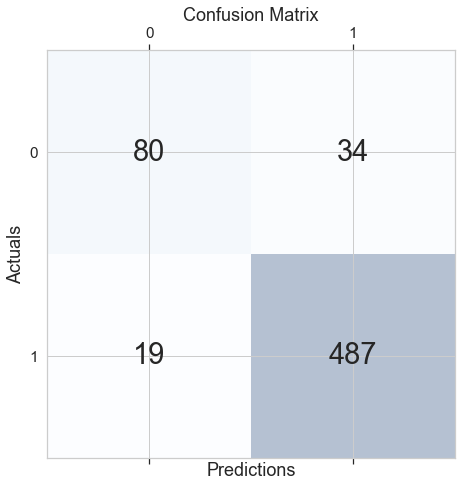

In [65]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()